In [280]:
#Importation des librairies necessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import array
from numpy import mean
from numpy import cov
#pour les vecteurs la linalg
from numpy.linalg import eig
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

### DATA  preparation

In [261]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv", sep=",");
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [285]:
#a-1.Imputation des données
#identifier les valeurs Nan

print("presence des valeurs Nan :",df.isnull().values.any())

presence des valeurs Nan : False


In [263]:
#donc il n'ya pas des valeurs Nan

In [264]:
df.columns.values
#afficher les noms des colonnes

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [265]:
#verification des types des données
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [266]:
#supprimer costumed id
df2 = df.iloc[:,1:]
df2.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


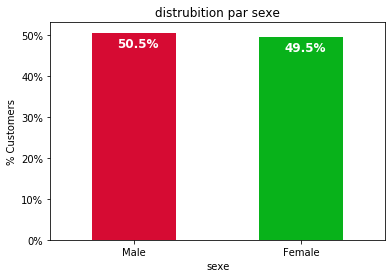

In [267]:
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
colors = ['#D60B33','#08B21A']
ax = (df['gender'].value_counts()*100.0 /len(df)).plot(kind='bar',stacked = True,rot = 0,color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_xlabel('sexe')
ax.set_ylabel('% Customers')
ax.set_title('distrubition par sexe')

#creattion de la liste
totals = []

#trouver les valeurs et les ajouter dans la liste
for i in ax.patches:
    totals.append(i.get_width())

# 
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')

In [268]:
#on peut conclure que la distrubution est équilibrée

Text(0.5, 1.0, '% of Sénior citoyen')

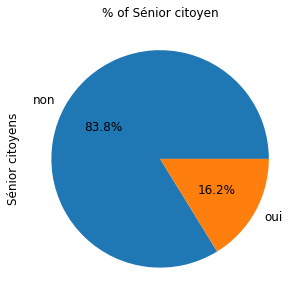

In [269]:
ax = (df['SeniorCitizen'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['non', 'oui'],figsize =(5,5), fontsize = 12 )                                                                           
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Sénior citoyens',fontsize = 12)
ax.set_title('% of Sénior citoyen', fontsize = 12)

In [270]:
#Il n'y a que 16% des clients qui sont des seniors. Ainsi, la plupart de nos clients dans les données sont des personnes plus jeunes

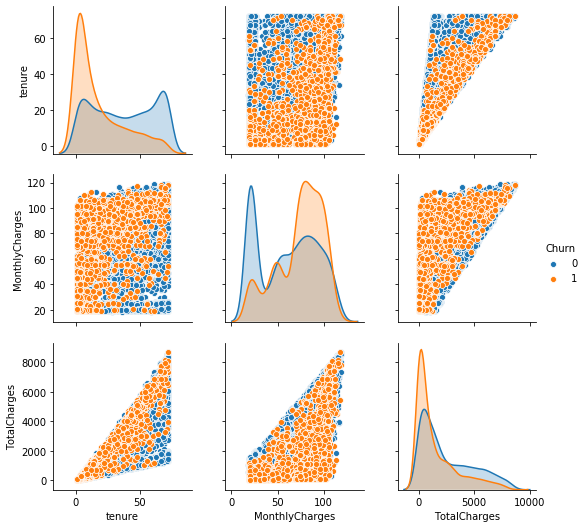

In [271]:
sns.pairplot(df3,vars = ['tenure','MonthlyCharges','TotalCharges'], hue="Churn")

In [272]:
#Statut de partenaire et de personne à charge -

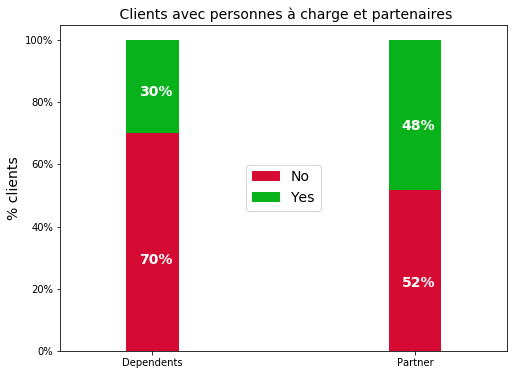

In [273]:
df4 = pd.melt(df, id_vars=['customerID'], value_vars=['Dependents','Partner'])
df5 = df4.groupby(['variable','value']).count().unstack()
df5 = df5*100/len(df)
colors = ['#D60B33','#08B21A']
ax = df5.loc[:,'customerID'].plot.bar(stacked=True, color=colors,
                                      figsize=(8,6),rot = 0,
                                     width = 0.2)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% clients',size = 14)
ax.set_xlabel('')
ax.set_title(' Clients avec personnes à charge et partenaires',size = 14)
ax.legend(loc = 'center',prop={'size':14})

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)


In [ ]:
#Environ 50% des clients ont un partenaire, tandis que seulement 30% du total des clients ont des personnes à charge.

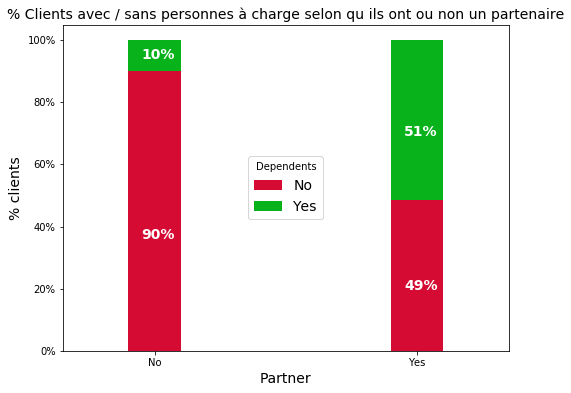

In [274]:
colors = ['#D60B33','#08B21A']
partner_dependents = df.groupby(['Partner','Dependents']).size().unstack()

ax = (partner_dependents.T*100.0 / partner_dependents.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (8,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Dependents',fontsize =14)
ax.set_ylabel('% clients',size = 14)
ax.set_title('% Clients avec / sans personnes à charge selon qu ils ont ou non un partenaire',size = 14)
ax.xaxis.label.set_size(14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

In [ ]:
#Il est intéressant de noter que parmi les clients qui ont un partenaire, seulement environ la moitié d'entre eux ont également
#une personne à charge, tandis que l'autre moitié est independante. 
#De plus, comme prévu, parmi les clients qui n'ont pas de partenaire, une majorité (90%) d'entre eux n'ont pas de personnes à charge.

Text(0.5, 1.0, ' des clients de par leur ancienneté')

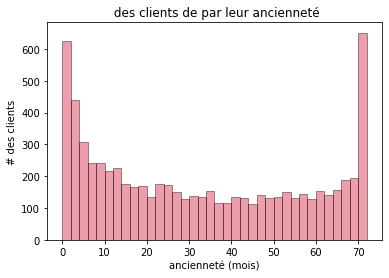

In [275]:
ax = sns.distplot(df['tenure'], hist=True, kde=False, 
             bins=int(180/5), color = '#D60B33', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('# des clients')
ax.set_xlabel('ancienneté (mois)')
ax.set_title(' des clients de par leur ancienneté')

In [16]:
#Durée du mandat: 
#après avoir regardé l'histogramme ci-dessous, nous pouvons voir que de nombreux clients travaillent avec la société 
#de télécommunications depuis un mois seulement, alors que beaucoup sont là depuis environ 72 mois. 
#Cela peut être dû au fait que différents clients ont des contrats différents. 
#Ainsi, en fonction du contrat dans lequel ils ont souscrit, 
#il pourrait être plus / moins facile pour les clients de rester / quitter l'entreprise de télécommunications.

Text(0.5, 1.0, 'les clients par type de contrat')

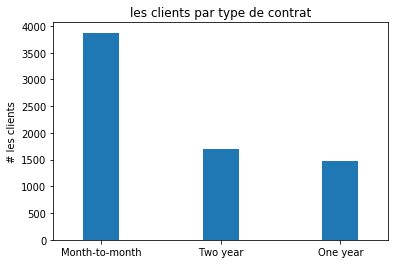

In [17]:
ax = df['Contract'].value_counts().plot(kind = 'bar',rot = 0, width = 0.3)
ax.set_ylabel('# les clients')
ax.set_title('les clients par type de contrat')

In [18]:
#la plupart des clients sont dans le contrat mensuel. 
#Alors qu'il y a un nombre égal de clients dans les contrats de 1 an et 2 ans.

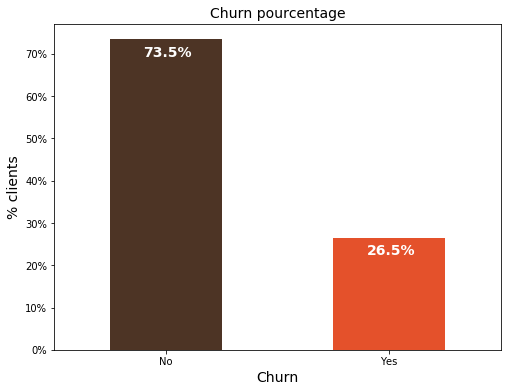

In [19]:
colors = ['#4D3425','#E4512B']
ax = (df['Churn'].value_counts()*100.0 /len(df)).plot(kind='bar',
                                                                           stacked = True,
                                                                          rot = 0,
                                                                          color = colors,
                                                                         figsize = (8,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% clients',size = 14)
ax.set_xlabel('Churn',size = 14)
ax.set_title('Churn pourcentage', size = 14)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-4.0, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold',
           size = 14)

In [20]:
#Dans nos données, 74% des clients n'abandonnent pas. 

# Data preprocessing

In [21]:
#convertir totalcharges en numérique
df2.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df2.dtypes
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7032 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(2), object(16)
memory usage: 1.1+ MB


In [22]:
df2.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [23]:
#on trouve 11 valeur Nan donc va les supprimer

df2.dropna(inplace = True)
df2.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [279]:
#convertir les variables independantes
df2['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df2['Churn'].replace(to_replace='No',  value=0, inplace=True)

#Convertissons toutes les variables catégorielles en variables factices
df3 = pd.get_dummies(df2, prefix_sep='_', drop_first=True)
#dataset=pd.get_dummies(df, prefix_sep='_', drop_first=True)


SeniorCitizen            int64
tenure                   int64
MonthlyCharges         float64
Churn                    int64
gender_Male              uint8
                        ...   
TotalCharges_997.75      uint8
TotalCharges_998.1       uint8
TotalCharges_999.45      uint8
TotalCharges_999.8       uint8
TotalCharges_999.9       uint8
Length: 6560, dtype: object

In [25]:
df3.columns.values

array(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'gender_Male', 'Partner_Yes', 'Dependents_Yes',
       'PhoneService_Yes', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No internet service',
       'StreamingTV_Yes', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year',
       'PaperlessBilling_Yes', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype=object)

# ACP

In [26]:
# Exploration des données
#Analyse statistique et visualisations
df3.keys()
print(df3.shape) 
#nombre d'observations/lignes
n = df3.shape[0]
#nombre de variables/colonnes
p = df3.shape[1]-1

(7032, 31)


In [27]:
from sklearn.preprocessing import StandardScaler
features = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
        'gender_Male', 'Partner_Yes', 'Dependents_Yes',
       'PhoneService_Yes', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No internet service',
       'StreamingTV_Yes', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year',
       'PaperlessBilling_Yes', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']
# Separating out the features
x = df3.loc[:, features].values
# Separating out the target
y = df3.loc[:,['Churn']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)
x

array([[-0.44032709, -1.28024804, -1.16169394, ..., -0.5253508 ,
         1.40476387, -0.54360352],
       [-0.44032709,  0.06430269, -0.26087792, ..., -0.5253508 ,
        -0.71186341,  1.83957601],
       [-0.44032709, -1.23950408, -0.36392329, ..., -0.5253508 ,
        -0.71186341,  1.83957601],
       ...,
       [-0.44032709, -0.87280842, -1.17000405, ..., -0.5253508 ,
         1.40476387, -0.54360352],
       [ 2.27103902, -1.15801615,  0.31916782, ..., -0.5253508 ,
        -0.71186341,  1.83957601],
       [-0.44032709,  1.36810945,  1.35793167, ..., -0.5253508 ,
        -0.71186341, -0.54360352]])

In [28]:
#vérification_Centrage Réduction 
import numpy as np
#moyenne
print(np.mean(x,axis=0))
#écart-type
print(np.std(x,axis=0,ddof=0))

[ 2.62714891e-17 -1.12664271e-16  6.06265133e-17 -1.11906439e-16
 -7.67935835e-17  6.26473971e-17  6.46682808e-17  1.37420097e-16
 -7.27518159e-17  3.63759080e-17  1.97036168e-17 -4.29437802e-18
 -4.29437802e-18 -1.50303231e-17 -4.29437802e-18 -4.40805274e-17
 -4.29437802e-18  7.42674788e-17 -4.29437802e-18  2.72819310e-17
 -4.29437802e-18  8.48771186e-17 -4.29437802e-18  6.66891646e-17
  1.03317683e-16 -1.86931749e-17 -4.06702860e-17 -8.36140662e-17
  5.98686819e-17  4.39542221e-17]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [29]:
#Analyse en composantes principales avec PCA de "scikit-learn"
from sklearn.decomposition import PCA
#instanciation de l'objet
acp = PCA(svd_solver='full')
# Affichage des paramètres
print(acp)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='full', tol=0.0, whiten=False)


In [30]:
#supprimer costumed churn
df4 = df3.drop(['Churn'], axis=1)
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 30 columns):
SeniorCitizen                            7032 non-null int64
tenure                                   7032 non-null int64
MonthlyCharges                           7032 non-null float64
TotalCharges                             7032 non-null float64
gender_Male                              7032 non-null uint8
Partner_Yes                              7032 non-null uint8
Dependents_Yes                           7032 non-null uint8
PhoneService_Yes                         7032 non-null uint8
MultipleLines_No phone service           7032 non-null uint8
MultipleLines_Yes                        7032 non-null uint8
InternetService_Fiber optic              7032 non-null uint8
InternetService_No                       7032 non-null uint8
OnlineSecurity_No internet service       7032 non-null uint8
OnlineSecurity_Yes                       7032 non-null uint8
OnlineBackup_No internet service   

In [31]:
#Appliquer l'ACP
coord = acp.fit_transform(x)
#nombre de composantes calculées
print(acp.n_components_) 



30


In [32]:
#Proportions de variance associées aux axes
print(acp.explained_variance_ratio_)

[3.31601383e-01 1.20090615e-01 9.01453604e-02 4.75499305e-02
 4.14301148e-02 4.12062738e-02 3.81528947e-02 3.33678430e-02
 3.12304397e-02 2.95429845e-02 2.65961293e-02 2.37964294e-02
 2.24944460e-02 2.05590830e-02 2.02482905e-02 1.74856860e-02
 1.55526514e-02 1.52541395e-02 1.46713170e-02 9.23412008e-03
 7.84361734e-03 1.91635429e-03 2.98961869e-05 5.88949794e-32
 2.47073638e-33 2.47073638e-33 2.47073638e-33 2.47073638e-33
 2.47073638e-33 2.47073638e-33]


In [33]:
#Par la propriété .explained_variance_ (calcul de la variance expliquée)
eigval = (df3.shape[0]-1)/df3.shape[0]*acp.explained_variance_
print(eigval)

[9.94804150e+00 3.60271846e+00 2.70436081e+00 1.42649792e+00
 1.24290344e+00 1.23618821e+00 1.14458684e+00 1.00103529e+00
 9.36913190e-01 8.86289535e-01 7.97883880e-01 7.13892883e-01
 6.74833380e-01 6.16772490e-01 6.07448715e-01 5.24570579e-01
 4.66579542e-01 4.57624184e-01 4.40139510e-01 2.77023603e-01
 2.35308520e-01 5.74906286e-02 8.96885606e-04 1.76684938e-30
 7.41220914e-32 7.41220914e-32 7.41220914e-32 7.41220914e-32
 7.41220914e-32 7.41220914e-32]


In [34]:
#Par les valeurs singulières .singular_values_
# issues de la factorisation de la matrice des données centrées et réduites (Matrice de corrélation)
print(acp.singular_values_**2/df3.shape[0])

[9.94804150e+00 3.60271846e+00 2.70436081e+00 1.42649792e+00
 1.24290344e+00 1.23618821e+00 1.14458684e+00 1.00103529e+00
 9.36913190e-01 8.86289535e-01 7.97883880e-01 7.13892883e-01
 6.74833380e-01 6.16772490e-01 6.07448715e-01 5.24570579e-01
 4.66579542e-01 4.57624184e-01 4.40139510e-01 2.77023603e-01
 2.35308520e-01 5.74906286e-02 8.96885606e-04 1.76684938e-30
 7.41220914e-32 7.41220914e-32 7.41220914e-32 7.41220914e-32
 7.41220914e-32 7.41220914e-32]


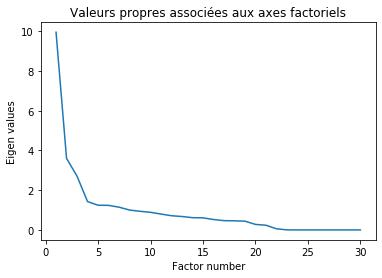

In [35]:
#scree plot
plt.plot(np.arange(1,p+1),eigval)
plt.title("Valeurs propres associées aux axes factoriels")
plt.ylabel("Eigen values")
plt.xlabel("Factor number")
plt.show()

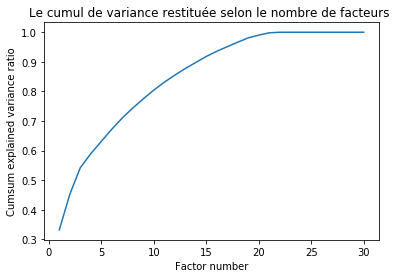

In [36]:
#La variance expliquée cumulée 
plt.plot(np.arange(1,p+1),np.cumsum(acp.explained_variance_ratio_))
plt.title("Le cumul de variance restituée selon le nombre de facteurs ")
plt.ylabel("Cumsum explained variance ratio")
plt.xlabel("Factor number")
plt.show()

In [37]:
# Nombre d'axes à retenir
bs = 1/np.arange(df4.shape[1],0,-1)
bs = np.cumsum(bs)
bs = bs[::-1]
bs
#Afficher conjointement les valeurs propres et les seuils 
print(pd.DataFrame({'Val.Propre':eigval,'Seuils':bs}))

      Val.Propre    Seuils
0   9.948041e+00  3.994987
1   3.602718e+00  2.994987
2   2.704361e+00  2.494987
3   1.426498e+00  2.161654
4   1.242903e+00  1.911654
5   1.236188e+00  1.711654
6   1.144587e+00  1.544987
7   1.001035e+00  1.402130
8   9.369132e-01  1.277130
9   8.862895e-01  1.166019
10  7.978839e-01  1.066019
11  7.138929e-01  0.975110
12  6.748334e-01  0.891776
13  6.167725e-01  0.814853
14  6.074487e-01  0.743425
15  5.245706e-01  0.676758
16  4.665795e-01  0.614258
17  4.576242e-01  0.555435
18  4.401395e-01  0.499879
19  2.770236e-01  0.447247
20  2.353085e-01  0.397247
21  5.749063e-02  0.349628
22  8.968856e-04  0.304174
23  1.766849e-30  0.260696
24  7.412209e-32  0.219029
25  7.412209e-32  0.179029
26  7.412209e-32  0.140567
27  7.412209e-32  0.103530
28  7.412209e-32  0.067816
29  7.412209e-32  0.033333


variance expliquée:  [3.31601383e-01 1.20090615e-01 9.01453604e-02 4.75499305e-02
 4.14301148e-02 4.12062738e-02 3.81528947e-02 3.33678430e-02
 3.12304397e-02 2.95429845e-02 2.65961293e-02 2.37964294e-02
 2.24944460e-02 2.05590830e-02 2.02482905e-02 1.74856860e-02
 1.55526514e-02 1.52541395e-02 1.46713170e-02 9.23412008e-03
 7.84361734e-03 1.91635429e-03 2.98961869e-05 5.88949794e-32
 2.47073638e-33 2.47073638e-33 2.47073638e-33 2.47073638e-33
 2.47073638e-33 2.47073638e-33]
Variance cumulative expliquée:  [0.33160138 0.451692   0.54183736 0.58938729 0.6308174  0.67202368
 0.71017657 0.74354442 0.77477486 0.80431784 0.83091397 0.8547104
 0.87720484 0.89776393 0.91801222 0.9354979  0.95105056 0.9663047
 0.98097601 0.99021013 0.99805375 0.9999701  1.         1.
 1.         1.         1.         1.         1.         1.        ]


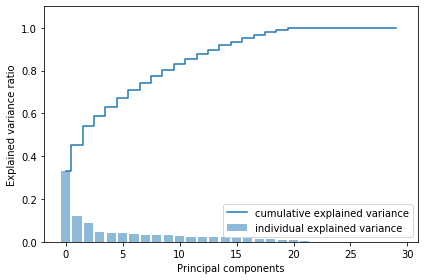

In [38]:
eig_vals_total = np.sum(eigval)
var_exp = eigval / eig_vals_total
cum_var_exp = np.cumsum(var_exp)
print('variance expliquée: ', var_exp)
print('Variance cumulative expliquée: ', cum_var_exp)

plt.bar(range(var_exp.shape[0]), var_exp, alpha = 0.5, 
        align = 'center', label = 'individual explained variance')
plt.step(range(var_exp.shape[0]), cum_var_exp, 
         where = 'mid', label = 'cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.ylim(0, 1.1)
plt.legend(loc = 'best')
plt.tight_layout()

d'après le théorème de kaiser si on a la val propre > au seuil on garde l'axe et la valeur propre >1

0 : SeniorCitizen

1 : tenure

2 : MonthlyCharges

3 : TotalCharges                          

### Etude des individus 

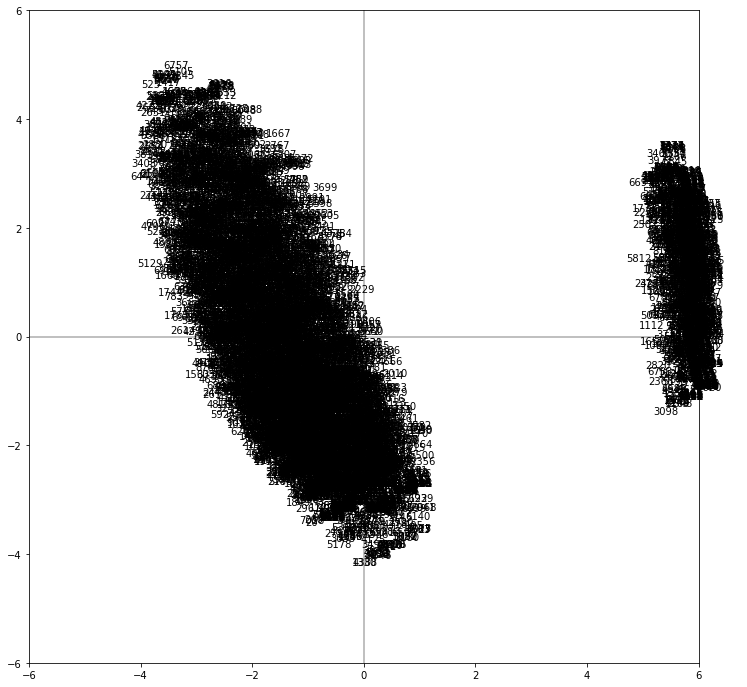

In [41]:
#positionnement des individus dans le premier plan
fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-6,6) #même limites en abscisse
axes.set_ylim(-6,6) #et en ordonnée
#placement des étiquettes des observations
for i in range(n): plt.annotate(df.index[i],(coord[i,0],coord[i,1]))
#ajouter les axes
plt.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=2)
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=2)
#affichage
plt.show()

In [46]:
#contribution des individus dans l'inertie totale
di = np.sum(x**2,axis=1)
print(pd.DataFrame({'ID':df4.index,'d_i':di}))


        ID        d_i
0        0  37.122372
1        1  22.603282
2        2  20.799338
3        3  40.779065
4        4  16.107660
...    ...        ...
7027  7038  28.969645
7028  7039  35.673168
7029  7040  38.645717
7030  7041  23.180155
7031  7042  30.195380

[7032 rows x 2 columns]


le client  numero 4 qui contribue le plus dans l'inercie total

### Qualité de représentation des individus – COS²

In [72]:
cos2 = coord**2
for j in range(p):
 cos2[:,j] = cos2[:,j]/di
print(pd.DataFrame({'id':df4.index,'COS2_1':cos2[:,0],'COS2_2':cos2[:,1],'COS2_3':cos2[:,2],'COS2_4':cos2[:,3]}))
a=pd.DataFrame({'id':df4.index,'COS2_1':cos2[:,0],'COS2_2':cos2[:,1],'COS2_3':cos2[:,2],'COS2_4':cos2[:,3]})
maxs=a.max()

print(maxs)

        id    COS2_1    COS2_2    COS2_3    COS2_4
0        0  0.004920  0.267962  0.329115  0.134094
1        1  0.001785  0.028095  0.067501  0.350224
2        2  0.001193  0.210508  0.032890  0.296536
3        3  0.019568  0.019103  0.610887  0.000548
4        4  0.023055  0.624956  0.090589  0.000490
...    ...       ...       ...       ...       ...
7027  7038  0.123990  0.058066  0.019323  0.154837
7028  7039  0.274468  0.277766  0.019807  0.001510
7029  7040  0.002956  0.160385  0.422807  0.058596
7030  7041  0.016316  0.181288  0.083924  0.013286
7031  7042  0.299234  0.168080  0.000018  0.000371

[7032 rows x 5 columns]
id        7042.000000
COS2_1       0.872740
COS2_2       0.636397
COS2_3       0.715317
COS2_4       0.498340
dtype: float64


In [80]:
# Contribution des individus aux axes
ctr = coord**2
for j in range(p):
 ctr[:,j] = ctr[:,j]/(n*eigval[j])

print(pd.DataFrame({'id':df4.index,'CTR_1':ctr[:,0],'CTR_2':ctr[:,1],'CTR_3':ctr[:,2],'CTR_4':ctr[:,3]}))
a=pd.DataFrame({'id':df4.index,'CTR_1':ctr[:,0],'CTR_2':ctr[:,1],'CTR_3':ctr[:,2],'CTR_4':ctr[:,3]})
maxs=a.max()

        id         CTR_1     CTR_2         CTR_3         CTR_4
0        0  2.610913e-06  0.000393  6.424501e-04  4.962440e-04
1        1  5.766515e-07  0.000025  8.023026e-05  7.891645e-04
2        2  3.547725e-07  0.000173  3.597206e-05  6.148610e-04
3        3  1.140662e-05  0.000031  1.309950e-03  2.229396e-06
4        4  5.308593e-06  0.000397  7.673023e-05  7.862933e-07
...    ...           ...       ...           ...           ...
7027  7038  5.134694e-05  0.000066  2.943494e-05  4.471661e-04
7028  7039  1.399644e-04  0.000391  3.715411e-05  5.368839e-06
7029  7040  1.633239e-06  0.000245  8.592109e-04  2.257470e-04
7030  7041  5.406606e-06  0.000166  1.022962e-04  3.070133e-05
7031  7042  1.291620e-04  0.000200  2.786918e-08  1.117706e-06

[7032 rows x 5 columns]


### Etude des variables 

- Corrélation des variables avec les axes

In [81]:
#le champ components_ de l'objet ACP
print(acp.components_)
#racine carrée des valeurs propres
sqrt_eigval = np.sqrt(eigval)
#corrélation des variables avec les axes
corvar = np.zeros((p,p))
for k in range(p):
 corvar[:,k] = acp.components_[k,:] * sqrt_eigval[k]

#afficher la matrice des corrélations variables x facteurs
print(corvar)
#on affiche pour les 4 premiers axes
print(pd.DataFrame({'id':df.columns,'COR_1':corvar[:,0],'COR_2':corvar[:,1],'COR_3':corvar[:,2],'COR_4':corvar[:,3]}))

[[-7.20914462e-02 -7.11832644e-02 -2.82508680e-01 -1.84940797e-01
   3.11970136e-03 -2.57677076e-02  4.06557617e-02  2.99098355e-02
  -2.99098355e-02 -1.11161796e-01 -1.79563650e-01  3.02376502e-01
   3.02376502e-01 -1.21707297e-01  3.02376502e-01 -1.53136157e-01
   3.02376502e-01 -1.59489919e-01  3.02376502e-01 -1.29405328e-01
   3.02376502e-01 -1.79026234e-01  3.02376502e-01 -1.80081658e-01
  -2.27798336e-03  3.66408864e-02 -1.19468650e-01 -1.36495956e-02
  -9.39902068e-02  1.31977033e-01]
 [-5.93214661e-02  4.38529007e-01  8.35507771e-02  3.76583662e-01
  -2.24196684e-03  2.61038358e-01  1.85433732e-01  1.16353530e-01
  -1.16353530e-01  1.84522271e-01 -4.01149546e-02  1.17568677e-01
   1.17568677e-01  1.73206927e-01  1.17568677e-01  1.68528810e-01
   1.17568677e-01  1.93730963e-01  1.17568677e-01  1.91674923e-01
   1.17568677e-01  1.42387564e-01  1.17568677e-01  1.42779795e-01
   9.56342239e-02  3.52862899e-01 -6.43010859e-02  1.83299262e-01
  -2.13503823e-01 -5.51881505e-02]
 [-1.3

ValueError: arrays must all be same length

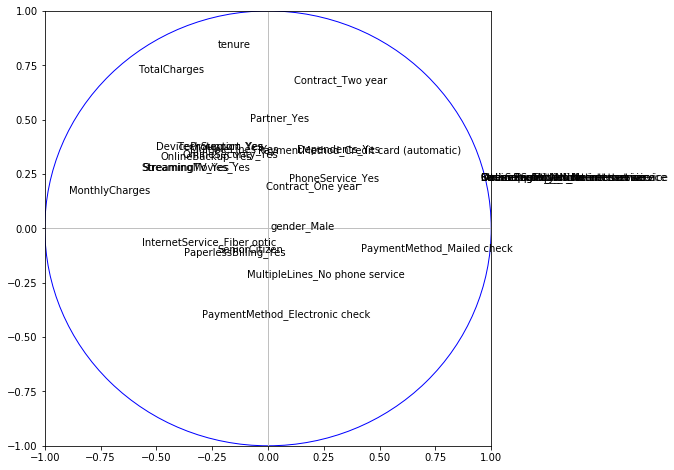

In [84]:
#cercle des corrélations
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)
#affichage des étiquettes (noms des variables)
for j in range(p):
 plt.annotate(df4.columns[j],(corvar[j,0],corvar[j,1]))

#ajouter les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)
#ajouter un cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)

#affichage
plt.show()

D’aprés le cercle de correlation on constate une forte correlation entre les variables " PaperlessBilling_Yes" , “InternetService_Fiber optic” et "SeniorCitizen" ce qui est évident

on peut conclure donc que la fibre optique est le service le plus avantageux, en particulier pour le jeune citoyen.

D’aprés le cercle de correlation on constate une forte correlation entre les variables " DeviceProtection_Yes" , “OnlineBackup_Yes” et "StreamingTV_Yes" ce qui est évident

In [78]:
#cosinus carré des variables
#La qualité de représentation des variables par rapport aux axes
cos2var = corvar**2
print(pd.DataFrame({'id':df4.columns,'COS2_1':cos2var[:,0],'COS2_2':cos2var[:,1],'COS2_3':cos2var[:,2],'COS2_4':cos2var[:,3]}))

                                       id    COS2_1    COS2_2    COS2_3  \
0                           SeniorCitizen  0.051702  0.012678  0.049740   
1                                  tenure  0.050407  0.692830  0.009641   
2                          MonthlyCharges  0.793965  0.025150  0.133341   
3                            TotalCharges  0.340254  0.510920  0.006019   
4                             gender_Male  0.000097  0.000018  0.000199   
5                             Partner_Yes  0.006605  0.245493  0.005869   
6                          Dependents_Yes  0.016443  0.123882  0.034079   
7                        PhoneService_Yes  0.008900  0.048774  0.707574   
8          MultipleLines_No phone service  0.008900  0.048774  0.707574   
9                       MultipleLines_Yes  0.122927  0.122667  0.187036   
10            InternetService_Fiber optic  0.320756  0.005798  0.338030   
11                     InternetService_No  0.909565  0.049798  0.012036   
12     OnlineSecurity_No 

In [79]:
#Contribution des variables aux axes 
#contributions
ctrvar = cos2var
for k in range(p):
 ctrvar[:,k] = ctrvar[:,k]/eigval[k]
#on n'affiche que pour les deux premiers axes
print(pd.DataFrame({'id':df4.columns,'CTR_1':ctrvar[:,0],'CTR_2':ctrvar[:,1],'CTR_3':ctrvar[:,2],'CTR_4':ctrvar[:,3]}))

                                       id     CTR_1     CTR_2     CTR_3  \
0                           SeniorCitizen  0.005197  0.003519  0.018393   
1                                  tenure  0.005067  0.192308  0.003565   
2                          MonthlyCharges  0.079811  0.006981  0.049306   
3                            TotalCharges  0.034203  0.141815  0.002226   
4                             gender_Male  0.000010  0.000005  0.000073   
5                             Partner_Yes  0.000664  0.068141  0.002170   
6                          Dependents_Yes  0.001653  0.034386  0.012602   
7                        PhoneService_Yes  0.000895  0.013538  0.261642   
8          MultipleLines_No phone service  0.000895  0.013538  0.261642   
9                       MultipleLines_Yes  0.012357  0.034048  0.069161   
10            InternetService_Fiber optic  0.032243  0.001609  0.124994   
11                     InternetService_No  0.091432  0.013822  0.004451   
12     OnlineSecurity_No 

Diviser les données en données d'apprentissage et données de test

In [89]:
X= df4.values
y= pd.factorize(df3['Churn'])[0]

Text(0, 0.5, 'Erreur')

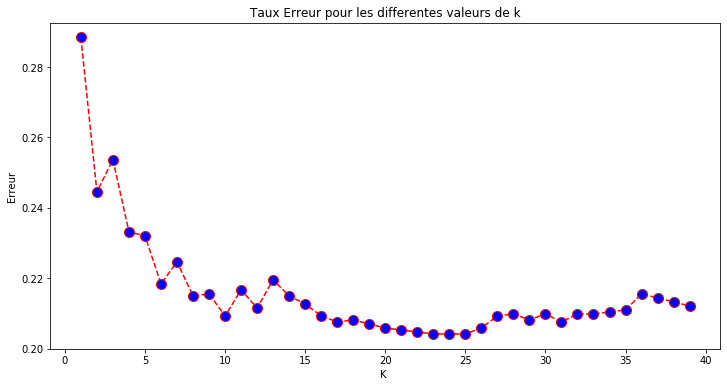

In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
#random_state 
#Centrage Réduction avec MinMaxScaler(): appliquer la fonction (xi-xmin)/(xmax-xmin)
#data preparation (cours 1 )!!
#on a terminé dans cette partie la descriptive de notre data frame 
from sklearn.neighbors import KNeighborsClassifier
# Choisir le nombre de voisins optimal
error = []
# Calculer l'erreur pour k entre 1 et 40 
#Pour chaque itération, l'erreur moyenne pour les valeurs prédites 
#de l'ensemble de test est calculée et sauvegardée ds la liste Erreur.
for i in range(1, 40):
    knn = KNeighborsClassifier(i)
    knn_model = knn.fit(X_train, y_train)
    pred_i = knn_model.predict(X_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Taux Erreur pour les differentes valeurs de k')
plt.xlabel('K ')
plt.ylabel('Erreur')
#Interpretation
#Le meilleur nombre de voisins k=?
#on va choisir 5 voisins et on appliquer notre fonctions sur la valeur 5 

Interpretation
Le meilleur nombre de voisins k=?
on va choisir 25 voisins et on appliquer notre fonctions sur la valeur 25

In [218]:
knn = KNeighborsClassifier(25)
knn_model = knn.fit(X_train, y_train)
y_pred_knn =knn_model.predict(X_test)

In [219]:
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))
#pour evaluer le model on utulise test set
#accurancy : test_score


Accuracy of K-NN classifier on training set: 0.79
Accuracy of K-NN classifier on test set: 0.80


In [220]:
knn_model = KNeighborsClassifier(n_neighbors = 25) #set K neighbor as 25
knn_model.fit(X_train,y_train)
predicted_y = knn_model.predict(X_test)
accuracy_knn = knn_model.score(X_test,y_test)
print("KNN accuracy according to K=25 is :",accuracy_knn)

KNN accuracy according to K=25 is : 0.7957906712172924


# matrice de confusion pour tester notre algo

In [221]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred_knn))


[[1227   84]
 [ 275  172]]


In [222]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.82      0.94      0.87      1311
           1       0.67      0.38      0.49       447

    accuracy                           0.80      1758
   macro avg       0.74      0.66      0.68      1758
weighted avg       0.78      0.80      0.77      1758



### Courbe ROC


In [223]:
#Affichage avec la bibliothèque graphique intégrée à Notebook
#matplotlib inline
from sklearn.metrics import roc_curve, auc

In [224]:
fpr3, tpr3, threshold3 = roc_curve(y_test, y_pred_knn)
roc_auc3 = auc(fpr3, tpr3)


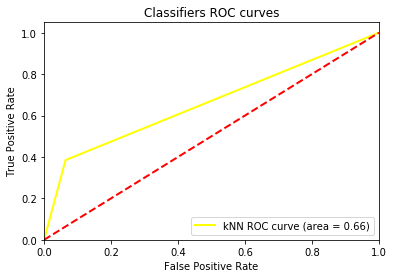

In [235]:
plt.figure() 

plt.plot(fpr3, tpr3, color='yellow', lw=2, label='kNN ROC curve (area = %0.2f)'% roc_auc3)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--') 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.05]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('Classifiers ROC curves') 
plt.legend(loc = "lower right")
plt.show()

### Les arbres de décision: Appliquer CART

In [226]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc_model = DecisionTreeClassifier().fit(X_train, y_train)
y_pred_dtc = dtc_model.predict(X_test)

In [236]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
accuracy_dt = dt_model.score(X_test,y_test)
print("Decision Tree accuracy is :",accuracy_dt)

Decision Tree accuracy is : 0.7360637087599545


In [237]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred_dtc))

[[1059  252]
 [ 220  227]]


In [281]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_dtc))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82      1311
           1       0.47      0.51      0.49       447

    accuracy                           0.73      1758
   macro avg       0.65      0.66      0.65      1758
weighted avg       0.74      0.73      0.73      1758



courbe roc

In [282]:
fpr1, tpr1, threshold1 = roc_curve(y_test, y_pred_dtc) 
roc_auc1 = auc(fpr1, tpr1)

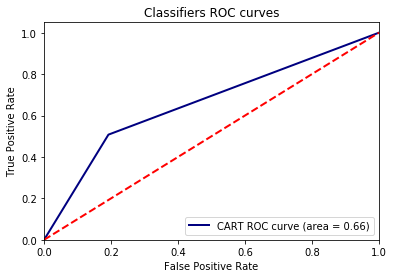

In [283]:
plt.figure() 
plt.plot(fpr1, tpr1, color='navy', lw=2, label='CART ROC curve (area = %0.2f)'% roc_auc1)

plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--') 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.05]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('Classifiers ROC curves') 
plt.legend(loc = "lower right")
plt.show()

#### comparaison entre les deux méthodes avec la courbe ROC


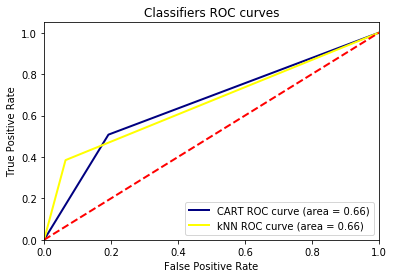

In [242]:
plt.figure() 
plt.plot(fpr1, tpr1, color='navy', lw=2, label='CART ROC curve (area = %0.2f)'% roc_auc1)

plt.plot(fpr3, tpr3, color='yellow', lw=2, label='kNN ROC curve (area = %0.2f)'% roc_auc3)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--') 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.05]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('Classifiers ROC curves') 
plt.legend(loc = "lower right")
plt.show()

### SVM

In [243]:
# %%SVM Classification
from sklearn.svm import SVC
svc_model = SVC(random_state = 1)
svc_model.fit(X_train,y_train)
accuracy_svc = svc_model.score(X_test,y_test)
print("SVM accuracy is :",accuracy_svc)

C:\Users\asus\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVM accuracy is : 0.7718998862343572


# Naiive Bayes


In [244]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train,y_train)
accuracy_nb = nb_model.score(X_test,y_test)
print("Naive Bayes accuracy is :",accuracy_nb)

Naive Bayes accuracy is : 0.6695108077360638


### RANDOM FOREST

In [254]:
# %%Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
rf_model_initial = RandomForestClassifier(n_estimators =25, random_state = 1)
rf_model_initial.fit(X_train,y_train)
print("Random Forest accuracy for 25 trees is :",rf_model_initial.score(X_test,y_test))

Random Forest accuracy for 25 trees is : 0.7849829351535836
